In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

import joblib

# Load Preprocessed data from .pkl files

In [21]:
# loading thee preprocessed data @sabinvankathmandu
X_train = pd.read_pickle("../data/X_train.pkl")
X_test = pd.read_pickle("../data/X_test.pkl")
y_train = pd.read_pickle("../data/y_train.pkl")
y_test = pd.read_pickle("../data/y_test.pkl")

print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

Training set: (211, 13), Test set: (53, 13)


# Train the linear regression model

In [22]:
# model iniitalised @sabinvankahtmandu
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
# Print model coefficients @sabinvankahtmandu
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Model Coefficients: [-2.08984771e+00 -3.62401635e-01 -1.78689534e-01 -1.11022302e-15
  6.13559312e-02  2.25618122e+00 -8.81851152e-01 -8.47251987e-01
  3.07073573e+00 -2.02714232e+00 -1.45409247e+00  1.68587802e-01
 -9.66155490e-01]
Intercept: 21.354640547563864


# Evaluate the Model

In [24]:
# Predictions on training and test data @sabinvankathmandu
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate metrics @sabinvankathmandu
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Training MSE: {mse_train:.2f}, Training R²: {r2_train:.2f}")
print(f"Test MSE: {mse_test:.2f}, Test R²: {r2_test:.2f}")


Training MSE: 6.40, Training R²: 0.73
Test MSE: 5.81, Test R²: 0.71


# Actual vs Predicted Prices Visualization

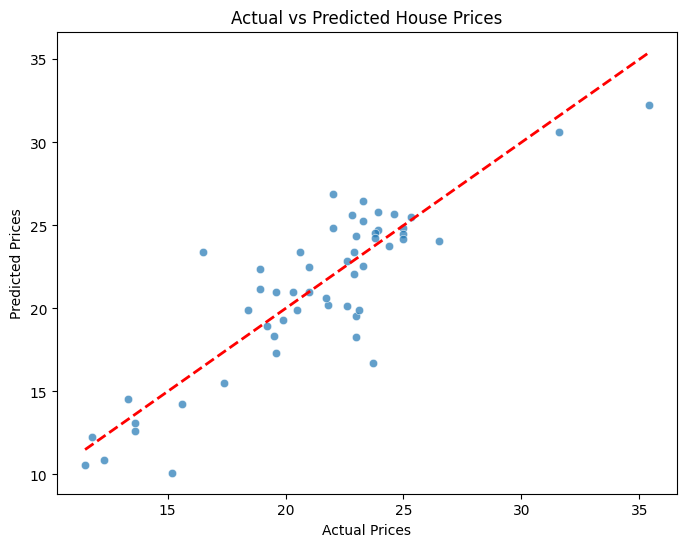

In [25]:
# Creating the actual vs predicted price linear plot @sabinvankathmandu
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "--r", lw=2)  # Identity line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


# Save the trained model

In [26]:
joblib.dump(model, "../model/linear_regression_model.pkl")
print("Model saved successfully!")

Model saved successfully!


# HyperParameter Tuning

In [27]:
# Code assisted by Chatgpt
# Define range of alpha values to test
alpha_values = np.logspace(-4, 2, 50)  # 50 values from 10^(-4) to 10^(2)

# Ridge Regression
ridge = Ridge()
ridge_params = {'alpha': alpha_values}

# Lasso Regression
lasso = Lasso()
lasso_params = {'alpha': alpha_values}


In [28]:
# perfrom grid search for best hyperparameters
# Ridge Regression with GridSearchCV
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='r2', n_jobs=-1)
ridge_grid.fit(X_train, y_train)

# Lasso Regression with GridSearchCV
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='r2', n_jobs=-1)
lasso_grid.fit(X_train, y_train)

# Best alpha values
print(f"Best Alpha for Ridge: {ridge_grid.best_params_['alpha']}")
print(f"Best Alpha for Lasso: {lasso_grid.best_params_['alpha']}")



Best Alpha for Ridge: 0.8286427728546842
Best Alpha for Lasso: 0.012067926406393288


In [29]:
# now training the optimized ridge and lasso models
# Ridge with best alpha training
ridge_best = Ridge(alpha=ridge_grid.best_params_['alpha'])
ridge_best.fit(X_train, y_train)

# train lasso with best alpha
lasso_best = Lasso(alpha=lasso_grid.best_params_['alpha'])
lasso_best.fit(X_train, y_train)


Lasso(alpha=0.012067926406393288)

In [30]:
# Compare the model perfromances
# Predictions
ridge_pred = ridge_best.predict(X_test)
lasso_pred = lasso_best.predict(X_test)

# Evaluation
ridge_r2 = r2_score(y_test, ridge_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

print(f"Ridge R²: {ridge_r2:.4f}")
print(f"Lasso R²: {lasso_r2:.4f}")

Ridge R²: 0.7135
Lasso R²: 0.7146


In [31]:
# Saving the best models Ridge and lasso
joblib.dump(ridge_best, "../model/ridge_model.pkl")
joblib.dump(lasso_best, "../model/lasso_model.pkl")

print("Optimized Ridge & Lasso models saved!")


Optimized Ridge & Lasso models saved!
